# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

This is an Unsupervised Machine Learning problem which aims to identify customer segments on transnational dataset which contains all the transactions between 01/12/2010 and 09/12/2011.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Our task is to identify major customer segments on a transnational data set which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online retail.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline

### Dataset Loading

In [98]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module/Project/Unsupervised/Online Retail.xlsx - Online Retail.csv')

### Dataset First View

In [100]:
# Dataset First Look
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [101]:
# Dataset Rows & Columns count
rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("The number of rows are: " + str(rows))
print("The number of columns are: " + str(cols))

The number of rows are: 541909
The number of columns are: 8


### Dataset Information

In [102]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [103]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

5268

There are 5268 rows with dupplicate values.

#### Missing Values/Null Values

In [104]:
# Missing Values/Null Values Count
dataset.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<Axes: >

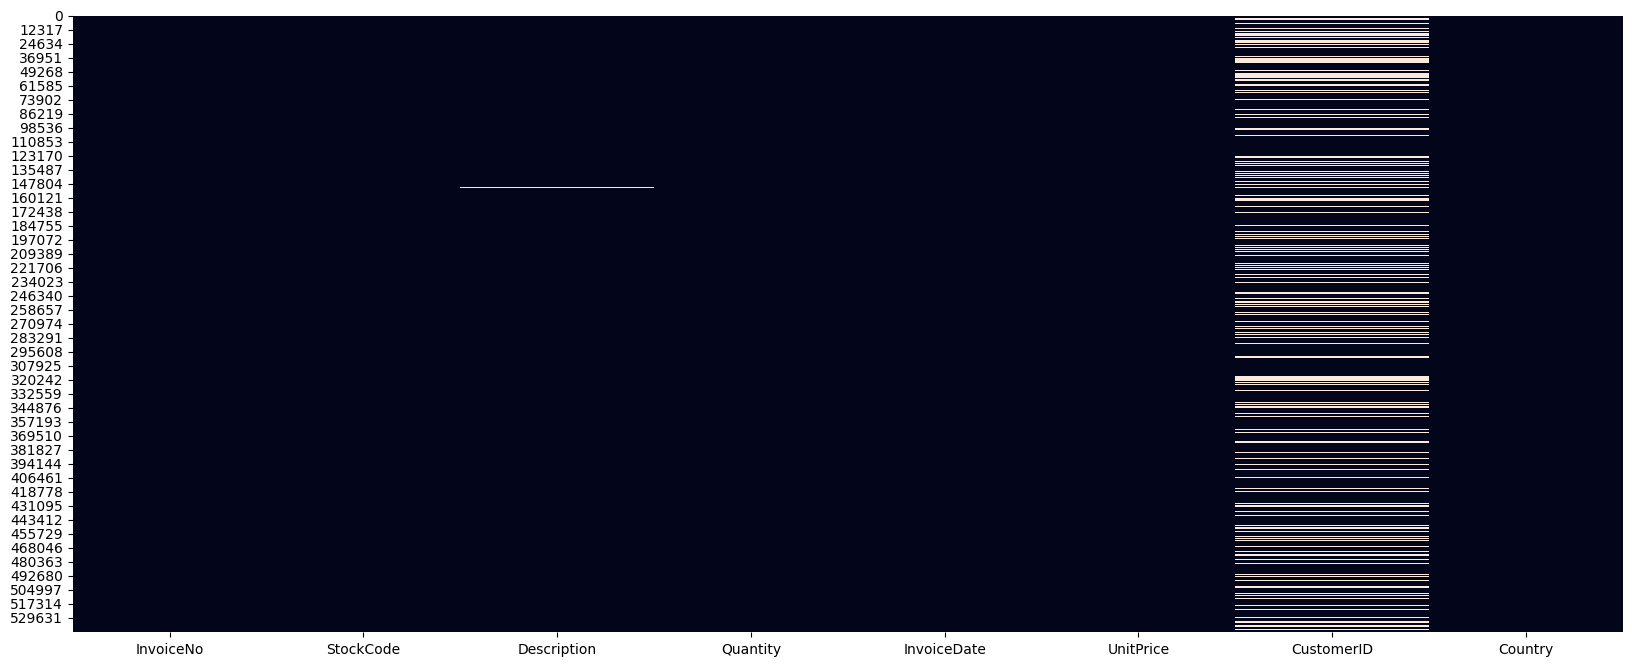

In [105]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



## ***2. Understanding Your Variables***

In [106]:
# Dataset Columns
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [107]:
# Dataset Describe
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

* **InvoiceNo** - Invoice Number. Unique 6-digit number. **InvoiceNo starting with 'c' means it is a cancellation**.
* **StockCode** - Product Code. Unique 5-digit number for distinct products.
* **Description** - Product name.
* **Quantity** - Quantities of each product per transaction.
* **InvoiceDate** - Invoice date and time on which date it was generated.
* **UnitPrice** - Product price per unit. Currency is Sterling.
* **CustomerID** - Customer Number assigned uniquely to each customer.
* **Country** - Name of country where customer resides.

### Check Unique Values for each variable.

In [108]:
dataset.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [109]:
dataset.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [110]:
# Check Unique Values for each variable.
pd.Series({col:dataset[col].unique() for col in dataset})

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [12/1/10 8:26, 12/1/10 8:28, 12/1/10 8:34, 12/...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

As we saw earlier, there were duplicate and null values in our dataset. So we would be removing them.

In [111]:
dataset.shape

(541909, 8)

In [112]:
# Dropping the duplicates
dataset = dataset.drop_duplicates()

In [113]:
# Duplicates removed and dataset updated
dataset.shape

(536641, 8)

We know from variable description that if InvoiceNo contains letter **C** then it means it is a cancellation order. So we will have to remove those records as well.

In [114]:
a = dataset[dataset['InvoiceNo'].str.contains("C")]

In [115]:
a.shape

(9251, 8)

In [116]:
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


There are **9251** cancellation records. We will remove them from our main dataset.

We can also see that all the cancelled records have **Quantity** as negative values. So, we will check if there are any rows with negative values that are missed out.

In [117]:
dataset = dataset[~dataset['InvoiceNo'].str.contains("C")]

In [118]:
dataset.shape

(527390, 8)

In [119]:
a = dataset[(dataset['Quantity'] < 0)]
a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/10 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/10 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/10 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/10 15:30,0.0,NaN,United Kingdom


In [120]:
a.shape

(1336, 8)

So, there are 1336 rows with negative Quantity values. We will remove them as well.

In [121]:
dataset = dataset[~dataset['Quantity'] < 0]

In [122]:
dataset.shape

(526054, 8)

As we had seen earlier, there were null values for CustomerId. So, we will remove the rows that are null.

In [123]:
dataset.dropna(inplace=True)

In [124]:
dataset.shape

(392732, 8)

We are now left 392732 rows to work with.

### What all manipulations have you done and insights you found?

* Dropped duplicate values from our dataset. Total rows removed - 5268
* **InvoiceNo** which contained letter **C**(means cancellation) have been removed from the dataset. Total rows removed - 9251
* **Quantity** with negative values, which indicated cancellation, have been removed from the dataset. Total rows removed - 1336
* Removed the rows which had null values. Total rows removed - 133322

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Top Countries based on Customers

In [125]:
dataset_subset1 = dataset['Country'].value_counts().reset_index()
dataset_subset1.rename(columns={'index':'Country','Country':'Count'}, inplace=True)
dataset_subset1.head()

,Country,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


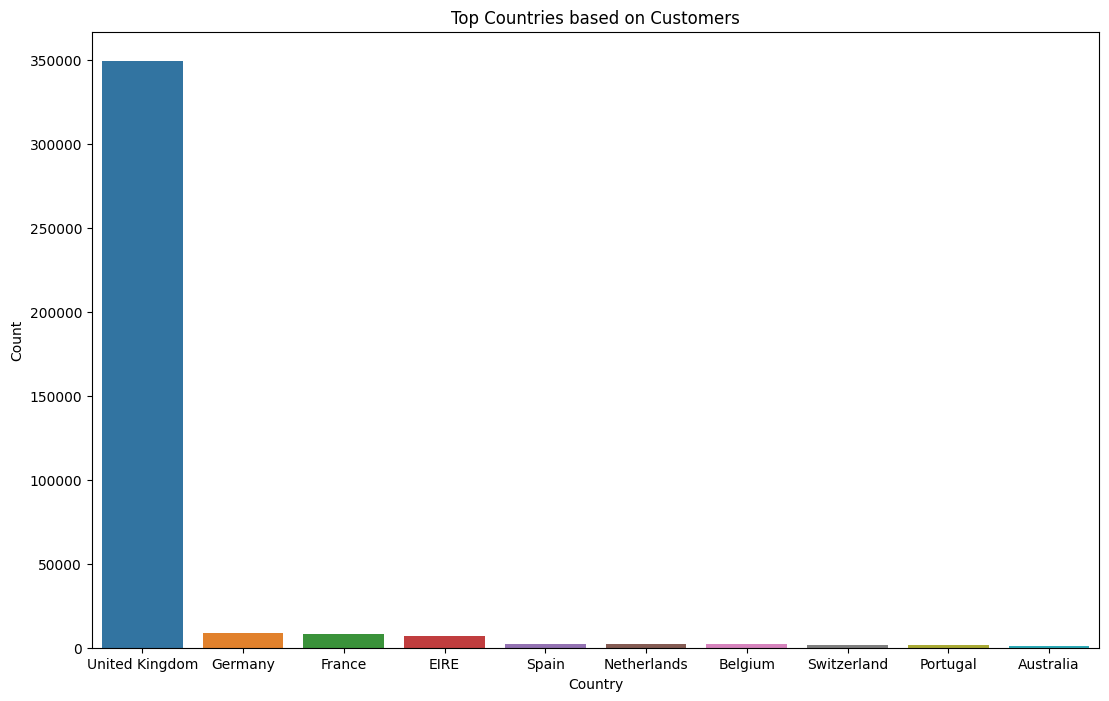

In [126]:
# Chart - 1 visualization code
plt.figure(figsize=(13,8))
plt.title("Top Countries based on Customers")
sns.barplot(x='Country', y='Count', data=dataset_subset1[:10])
plt.show()

##### What is/are the insight(s) found from the chart?

United Kingdom has the most number of customers.

#### Chart - 2 - Top Products Name

In [127]:
dataset_subset2 = dataset['Description'].value_counts().reset_index()
dataset_subset2.rename(columns={'index':'Description','Description':'Count'}, inplace=True)
dataset_subset2.head()

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


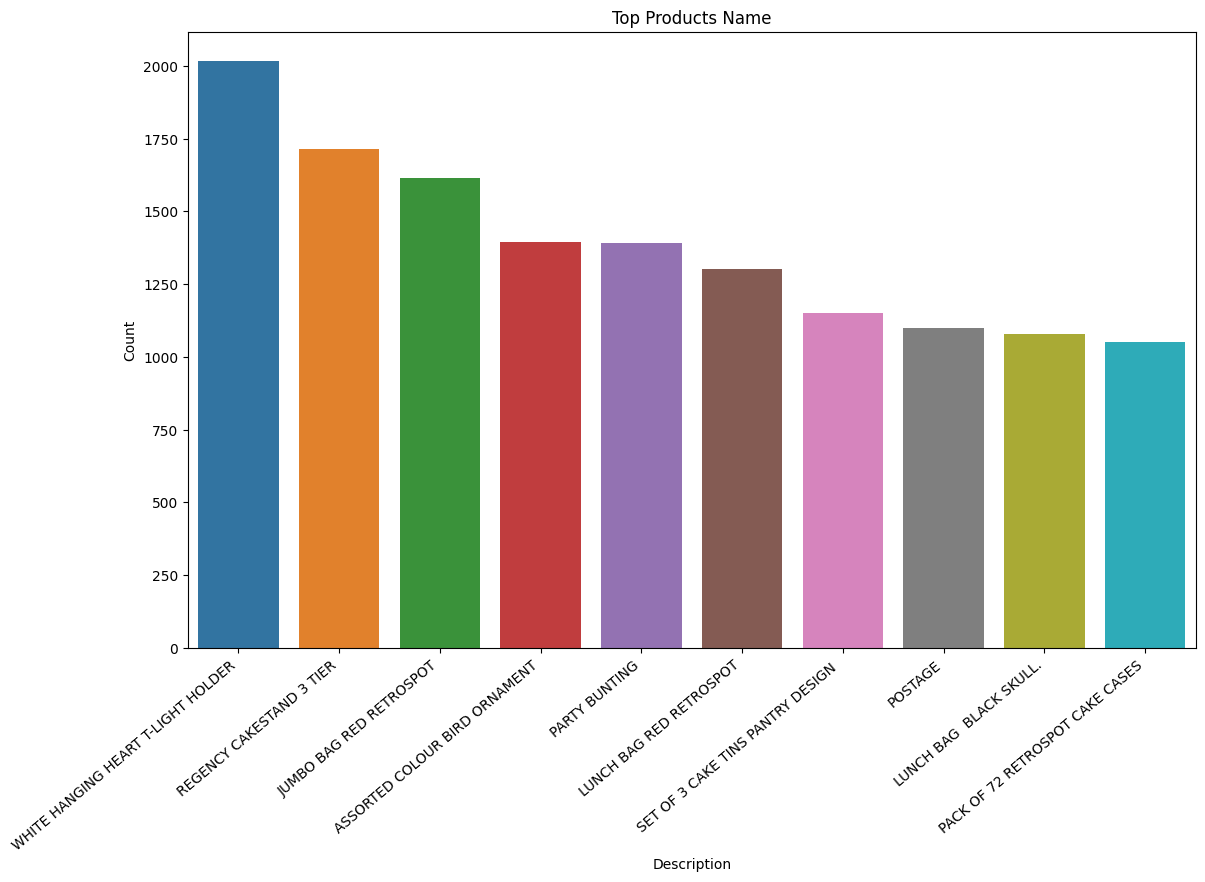

In [128]:
# Chart - 2 visualization code
plt.figure(figsize=(13,8))
plt.title('Top Products Name')
ax = sns.barplot(x='Description', y='Count', data=dataset_subset2[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

##### What is/are the insight(s) found from the chart?

**White Hanging Heart T-Light Holder**r followed by **Regency Cakestand 3 Tier** and **Jumbo Bag Red Retrospot** are the top products.

#### Chart - 3 - Top Customers based on money spent

In [129]:
# Making a copy of our original dataset so that manipulations doesn't affect the original dataset
dataset_subset3 = dataset.copy()

In [130]:
# Creating a new column named TotalPrice which is Quantity*UnitPrice
dataset_subset3['TotalPrice'] = dataset['Quantity'] * dataset['UnitPrice']
dataset_subset3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [131]:
# Creating a new dataset which will have all the customers grouped by and their total payments made
dataset_subset4 = dataset_subset3[['CustomerID','TotalPrice']].groupby(['CustomerID'], axis=0).sum().sort_values('TotalPrice', ascending=False).head(10)
dataset_subset4

,TotalPrice
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194390.79
16446.0,168472.50
14911.0,143711.17
12415.0,124914.53
14156.0,117210.08
17511.0,91062.38
16029.0,80850.84


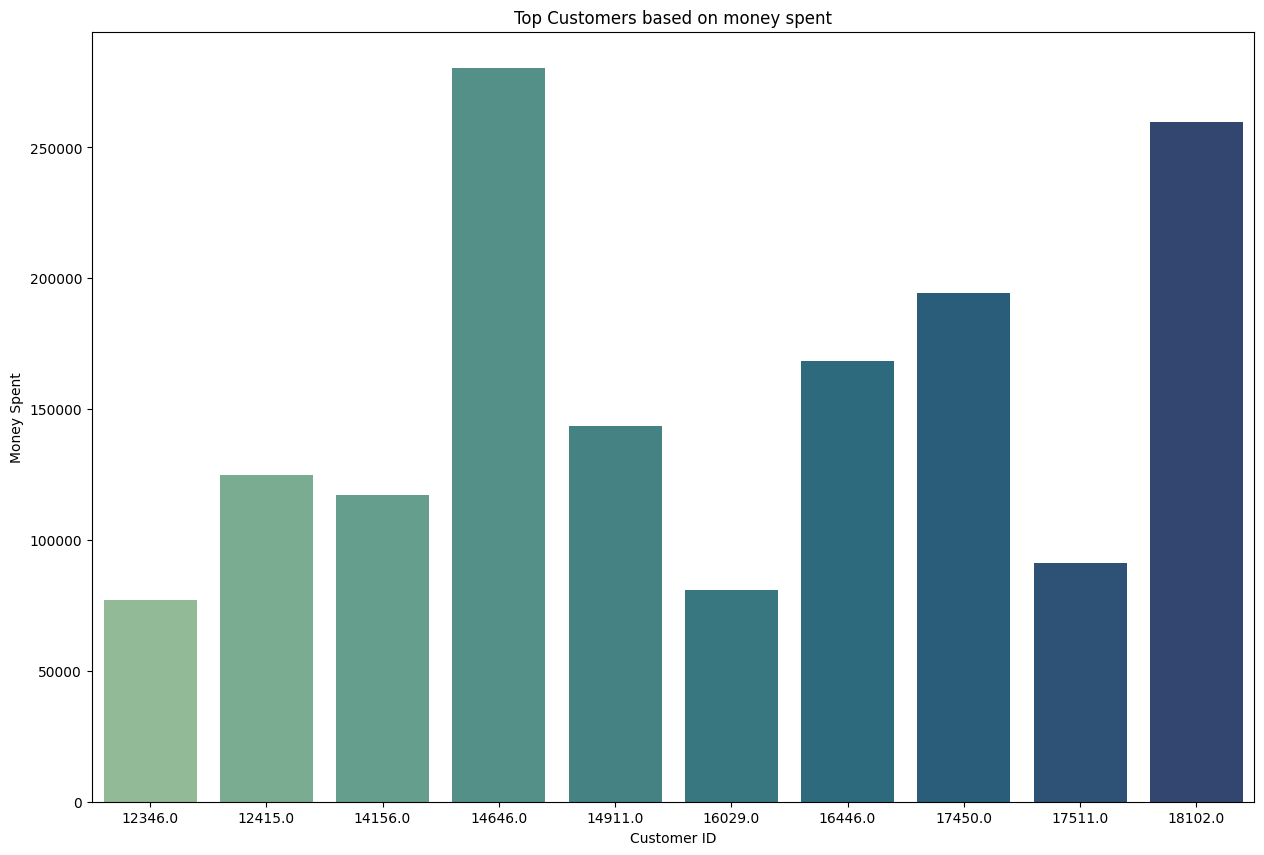

In [132]:
# Chart - 3 visualization code
plt.figure(figsize=(15,10))
sns.barplot(x=dataset_subset4.index, y=dataset_subset4.TotalPrice.values, palette="crest")
plt.title("Top Customers based on money spent")
plt.xlabel('Customer ID')
plt.ylabel('Money Spent')
plt.show()

##### What is/are the insight(s) found from the chart?

Customer with ID **14646** followed by **18102** and **17450** are the top customers who have spent most amount of money.

#### Chart - 4 - Top Products based on Quantities Sold

In [133]:
dataset_subset5 = dataset_subset3[['Description','Quantity']].groupby(['Description'], axis=0).sum().sort_values('Quantity', ascending=False).head(10)
dataset_subset5

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


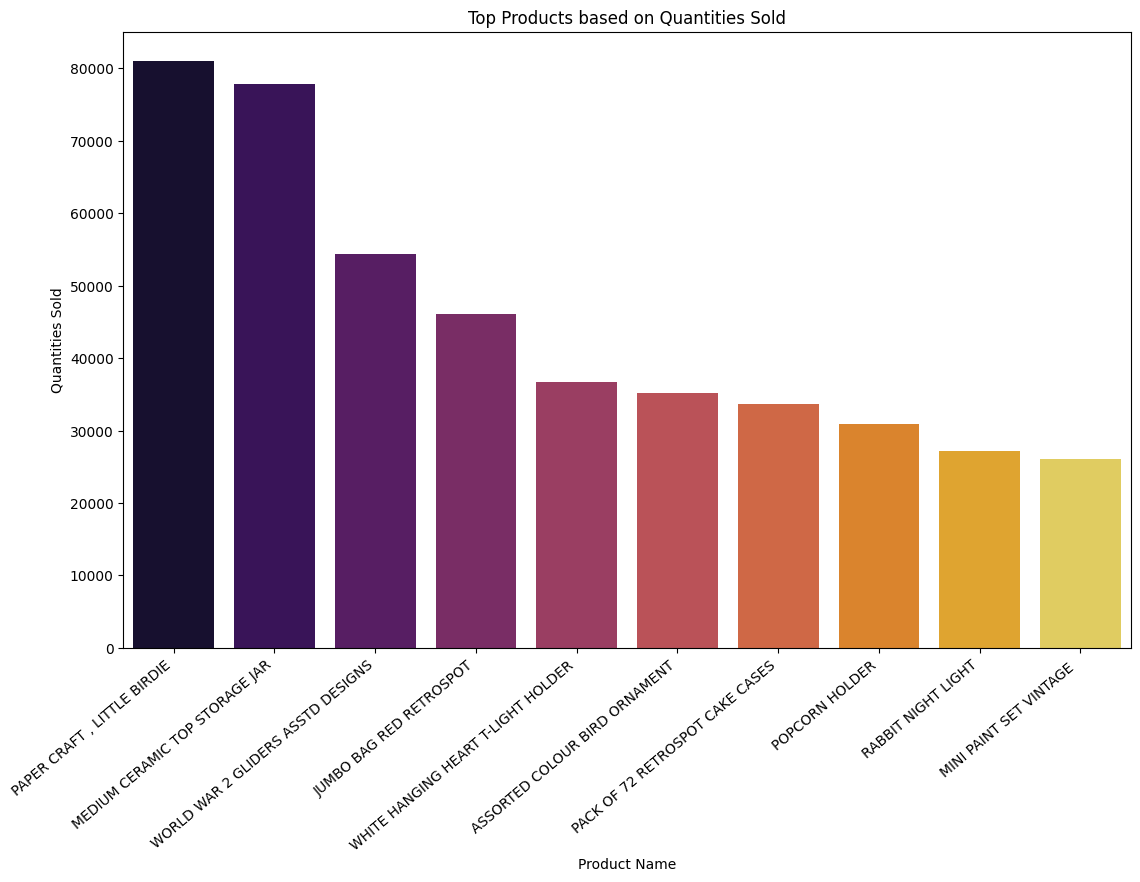

In [134]:
# Chart - 4 visualization code
plt.figure(figsize=(13,8))
ax = sns.barplot(x=dataset_subset5.index, y=dataset_subset5.Quantity.values, palette="inferno")
plt.title("Top Products based on Quantities Sold")
plt.xlabel('Product Name')
plt.ylabel('Quantities Sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

##### What is/are the insight(s) found from the chart?

**PAPER CRAFT , LITTLE BIRDIE** followed by **MEDIUM CERAMIC TOP STORAGE JAR** and **WORLD WAR 2 GLIDERS ASSTD DESIGNS** are the top products based on quantities sold.

#### Chart - 5 - Top Products based on Mean Prices

In [135]:
dataset_subset6 = dataset_subset3[['Description','UnitPrice']].groupby(['Description'], axis=0).mean().sort_values('UnitPrice', ascending=False).head(10)
dataset_subset6

,UnitPrice
Description,
DOTCOM POSTAGE,744.147500
PICNIC BASKET WICKER 60 PIECES,649.500000
Manual,174.650211
RUSTIC SEVENTEEN DRAWER SIDEBOARD,158.076923
REGENCY MIRROR WITH SHUTTERS,156.428571
VINTAGE BLUE KITCHEN CABINET,146.750000
VINTAGE RED KITCHEN CABINET,143.421053
CHEST NATURAL WOOD 20 DRAWERS,118.076923
LOVE SEAT ANTIQUE WHITE METAL,114.024390


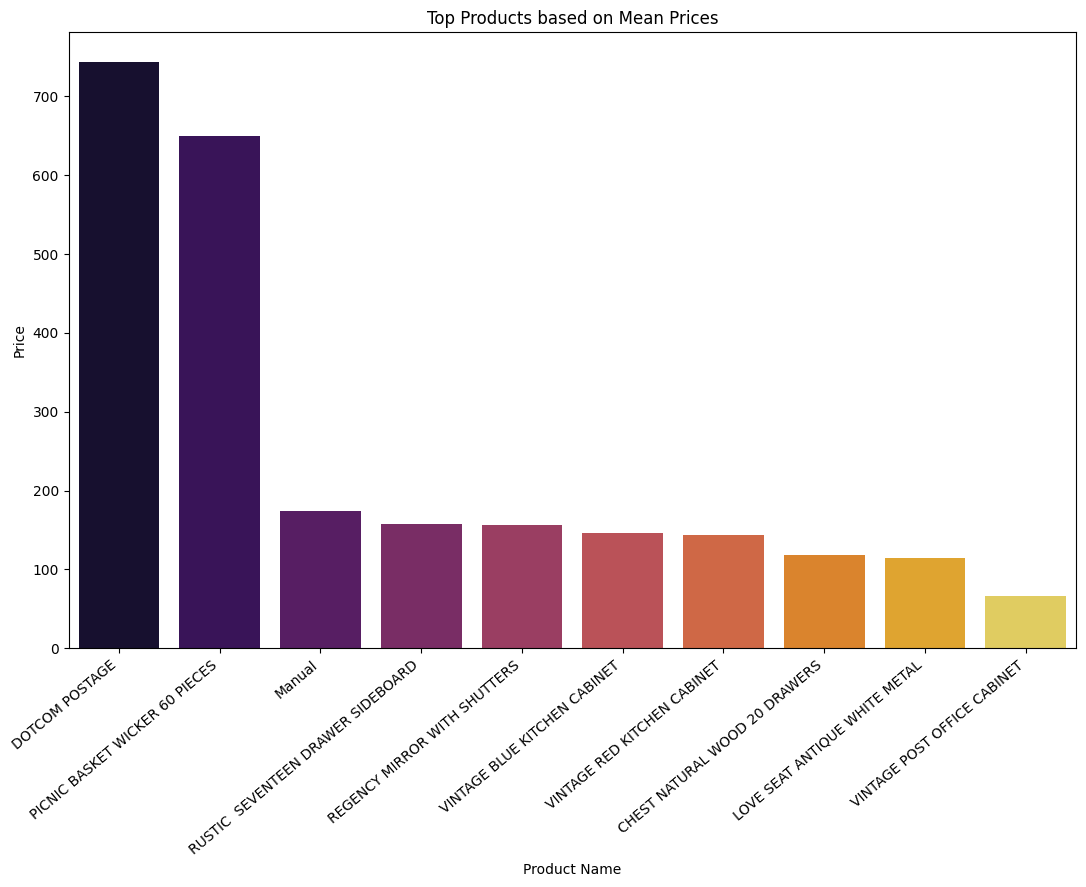

In [136]:
# Chart - 5 visualization code
plt.figure(figsize=(13,8))
ax = sns.barplot(x=dataset_subset6.index, y=dataset_subset6.UnitPrice.values, palette="inferno")
plt.title("Top Products based on Mean Prices")
plt.xlabel('Product Name')
plt.ylabel('Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

##### What is/are the insight(s) found from the chart?

**DOTCOM POSTAGE** followed by **PICNIC BASKET WICKER 60 PIECES** and  **Manual** are the top products based on mean prices.

#### Chart - 6 - Daily Sales

In [137]:
import datetime as dt

In [138]:
# Converting object to Datetime so that we can use datetime library and can use time, day, month from InvoiceDate
dataset_subset3['InvoiceDate'] = pd.to_datetime(dataset_subset3['InvoiceDate'])

In [139]:
dataset_subset3['Day'] = dataset_subset3['InvoiceDate'].dt.day
# dataset_subset3.head()

In [140]:
dataset_subset7 = dataset_subset3['Day'].value_counts().reset_index()
dataset_subset7.rename(columns={'index':'Day','Day':'Count'}, inplace=True)
dataset_subset7.head()

,Day,Count
0,6,18079
1,5,16128
2,8,15621
3,7,15429
4,17,14730


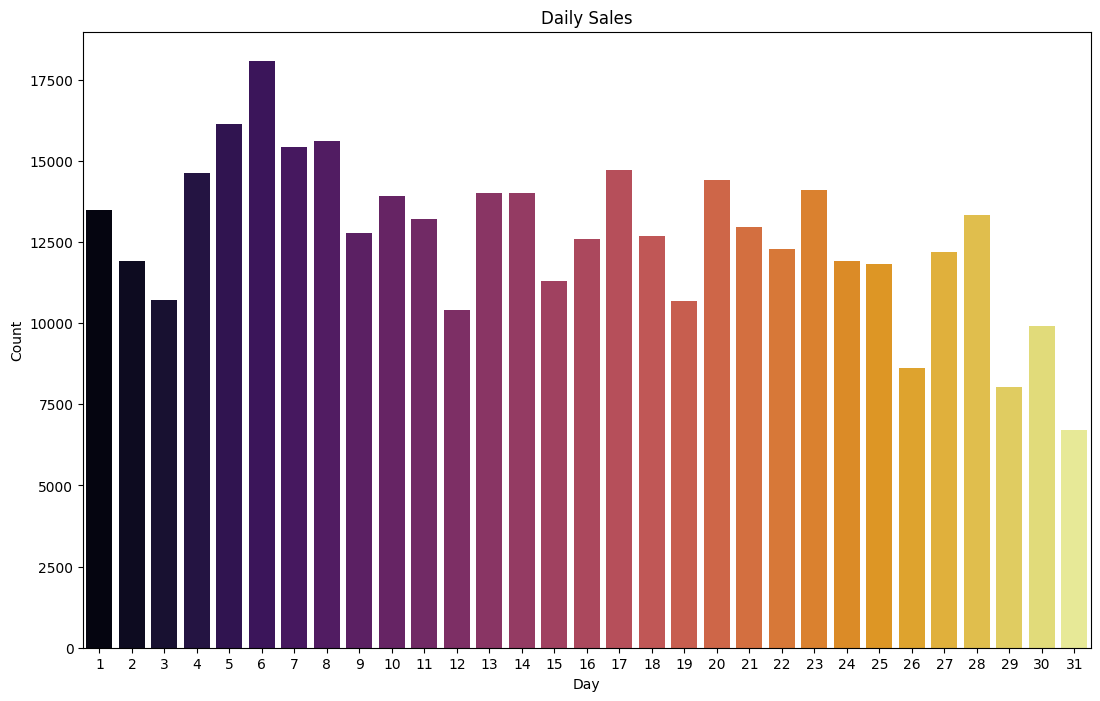

In [141]:
# Chart - 6 visualization code
plt.figure(figsize=(13,8))
plt.title("Daily Sales")
sns.barplot(x='Day', y='Count', data=dataset_subset7, palette="inferno")
plt.show()

##### What is/are the insight(s) found from the chart?

Customers generally did shopping at the starting of the month eather than at the end of the month.

#### Chart - 7 - Monthly Sales

In [142]:
dataset_subset3['Month'] = dataset_subset3['InvoiceDate'].dt.month

In [143]:
dataset_subset9 = dataset_subset3['Month'].value_counts().reset_index()
dataset_subset9.rename(columns={'index':'Month','Month':'Count'}, inplace=True)
dataset_subset9.head()

,Month,Count
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075


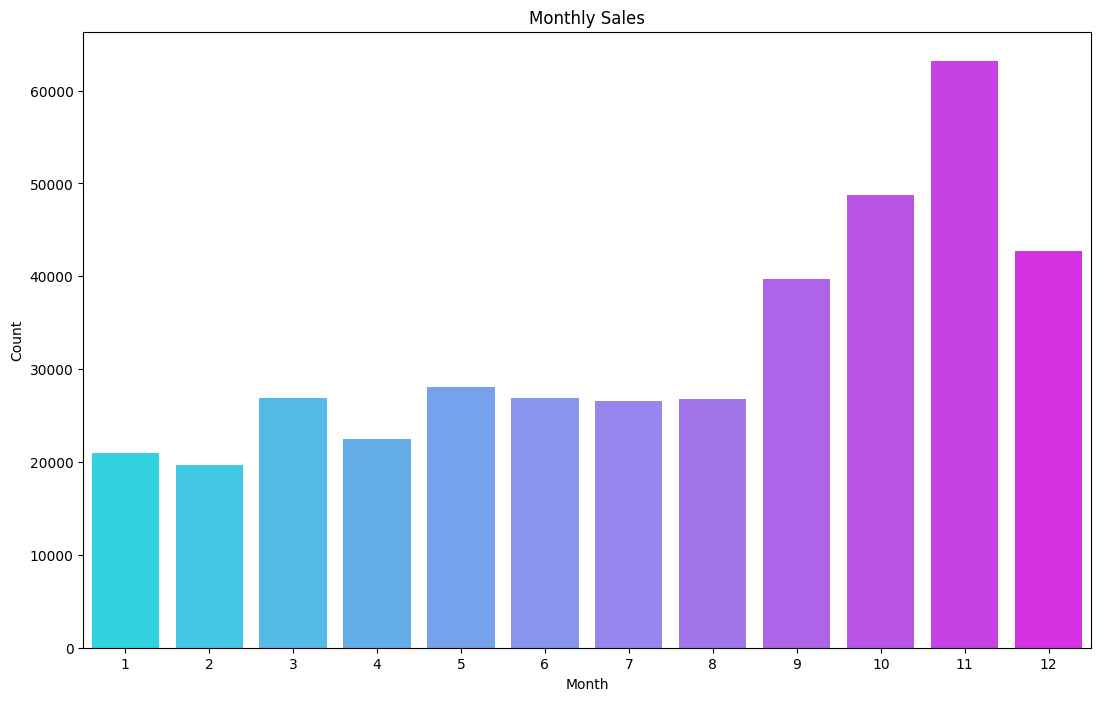

In [144]:
# Chart - 7 visualization code
plt.figure(figsize=(13,8))
plt.title("Monthly Sales")
sns.barplot(x='Month', y='Count', data=dataset_subset9, palette="cool")
plt.show()

##### What is/are the insight(s) found from the chart?

Most number of orders were made in the later half of the year particularyly **October**, **November** and **December** which also happens to be holiday seasons.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [150]:
# Handling Missing Values & Missing Value Imputation

The missing values have been handled earlier. 
All the row with missing values have been removed.

#### What all missing value imputation techniques have you used and why did you use those techniques?

There cannot be imputation for CustomerID as it is unique for customers.

### 2. Feature Manipulation & Selection

In [151]:
# Making a copy of the dataset incase some mismatch happens
dataset1 = dataset.copy()

#### 1. Feature Manipulation

In [152]:
# Manipulate Features to minimize feature correlation and create new features

In [153]:
# Changing object datatype to Datetime datatype for easy manipulation
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])

In [154]:
# Selecting the maximum or most recent date from all the orders
max_date = dataset["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

Building our Recency, Frequency and Monetary table for all our customers.

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

In [155]:
# Calculating Recency. Subtracting the max date, that we obtained from above, by the InvoiceDate and then converting it to days.
# Then grouping by all the CustomerID and selecting the Minimum value will give how recent the customer visited.
dataset['Days_since_last'] = max_date - dataset['InvoiceDate']
dataset['Days_since_last'] = dataset['Days_since_last'].dt.days

recency = dataset[['CustomerID', 'Days_since_last']].groupby('CustomerID').min()
recency.head()

,Days_since_last
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


In [156]:
# Calculating Frequency. It tells us how often a customer makes a purchase.
frequency = dataset[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count()
frequency.head()

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


In [157]:
# Making a new column called as TotalAmount which is based on unitPrice*Quantity.
# Calculating Monetary. Grouping by all the customerID and then adding all the TotalAmount will give us the total amount spent by the customer.
dataset['TotalAmount'] = dataset['UnitPrice']*dataset['Quantity']
monetary = dataset[['CustomerID', 'TotalAmount']].groupby('CustomerID').sum()
monetary.head()

,TotalAmount
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [158]:
# Merging recency, frequency, monetary based on CustomerID
dataset_rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
dataset_rfm.head()

,Days_since_last,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [159]:
# Changing the name of the columns to recency, frequency and monetary.
dataset_rfm = dataset_rfm.rename(columns={'Days_since_last':'Recency', 'InvoiceNo':'Frequency', 'TotalAmount':'Monetary'})
dataset_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


This is the table that we will be working on.

### 3. Data Transformation

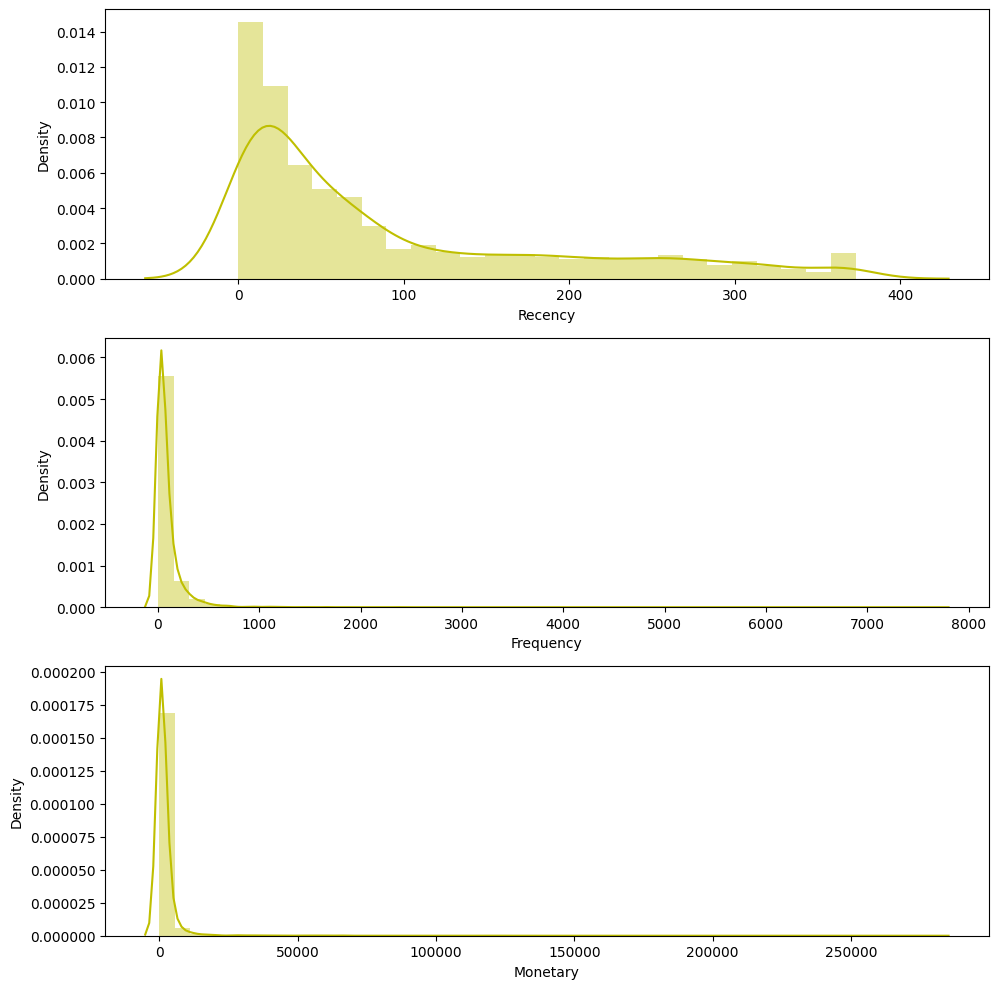

In [160]:
plt.figure(figsize=(10,10))
for i, col in enumerate(dataset_rfm):
    ax = plt.subplot(3,1, i+1)
    sns.distplot(dataset_rfm[col], color='y')
plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

From the above graphs, we can see that data is not normally distributed. It is positively skewed.

We can use multiple transformations, like:
* SquareRoot Transformation
* Log Transformation
* Box-Cox Transformation
* CubeRoot Transformation

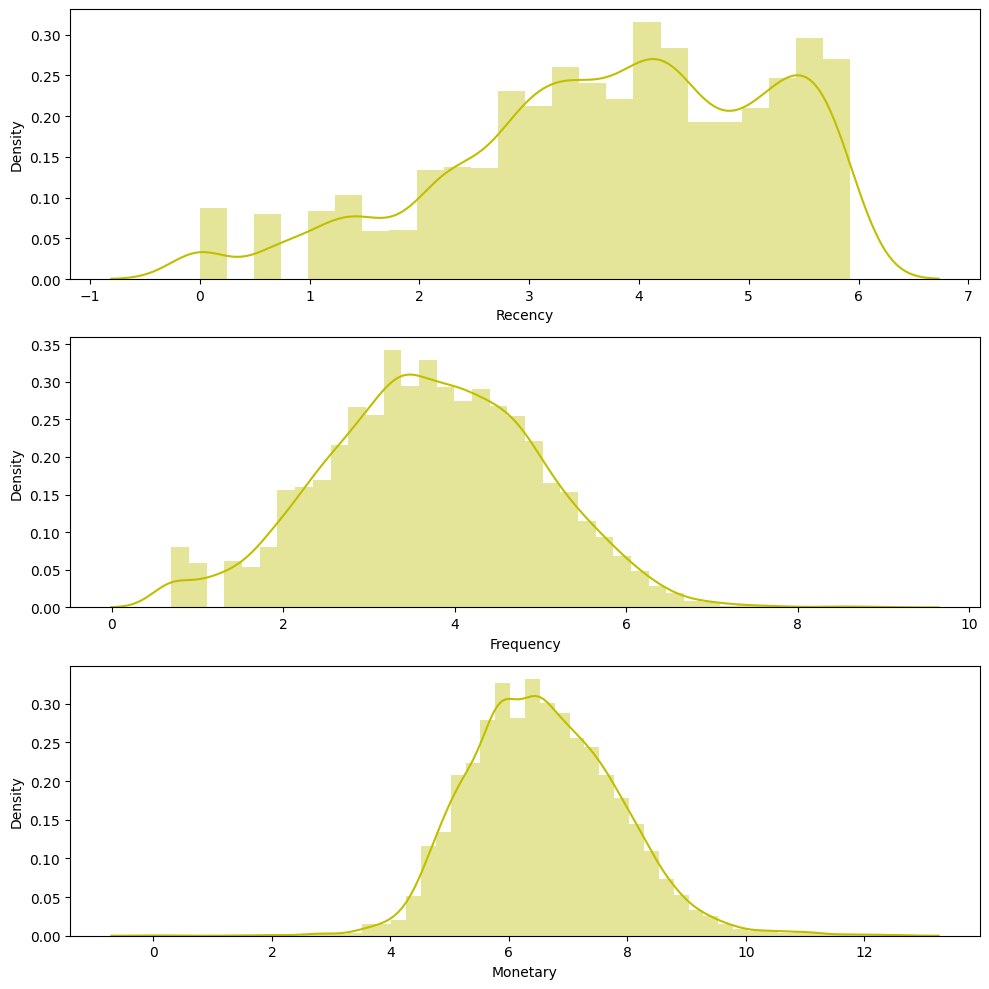

In [161]:
# Testing the data based on these transformation
# Log Transformation
plt.figure(figsize=(10,10))
for i, col in enumerate(dataset_rfm):
    ax = plt.subplot(3,1, i+1)
    sns.distplot(np.log1p(dataset_rfm[col]), color='y')
plt.tight_layout()

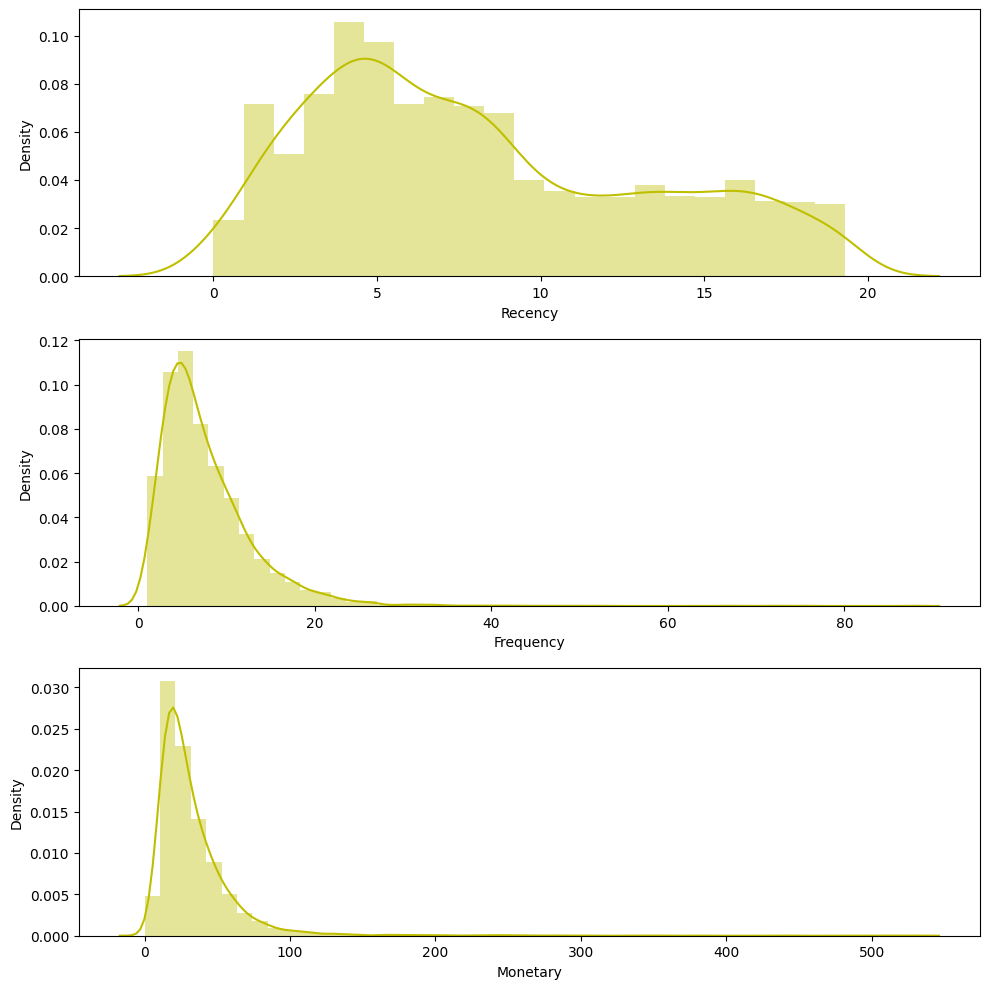

In [162]:
# Square Root transformation
plt.figure(figsize=(10,10))
for i, col in enumerate(dataset_rfm):
    ax = plt.subplot(3,1, i+1)
    sns.distplot(np.sqrt(dataset_rfm[col]), color='y')
plt.tight_layout()

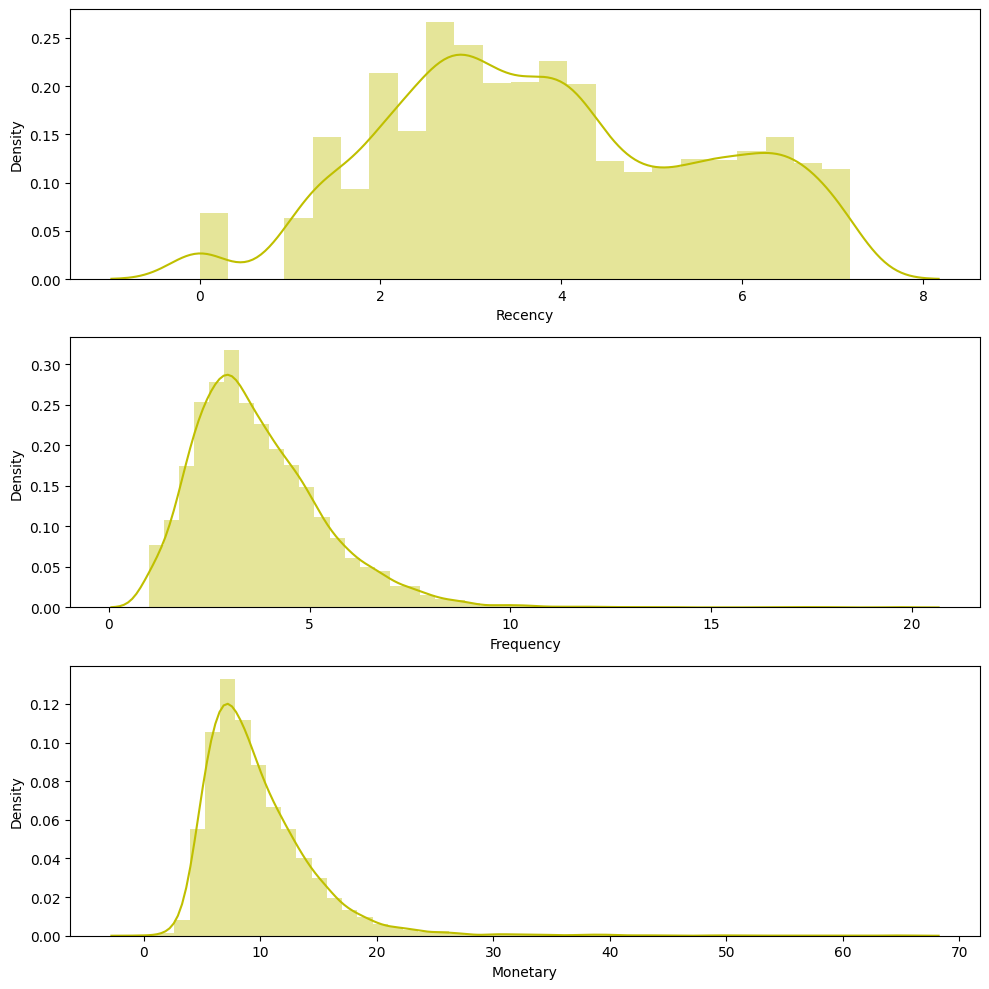

In [163]:
# Cube Root Transformation
plt.figure(figsize=(10,10))
for i, col in enumerate(dataset_rfm):
    ax = plt.subplot(3,1, i+1)
    sns.distplot(np.cbrt(dataset_rfm[col]), color='y')
plt.tight_layout()

From the above graphs, we will use Log Transformation for **Frequency**  and **Monetary**. CubeRoot Transformation for **Recency**.

In [164]:
# Transform Your data
dataset_rfm['Recency'] = pd.Series(np.cbrt(dataset_rfm['Recency'])).values
dataset_rfm['Frequency'] = pd.Series(np.log1p(dataset_rfm['Frequency'])).values
dataset_rfm['Monetary'] = pd.Series(np.log1p(dataset_rfm['Monetary'])).values

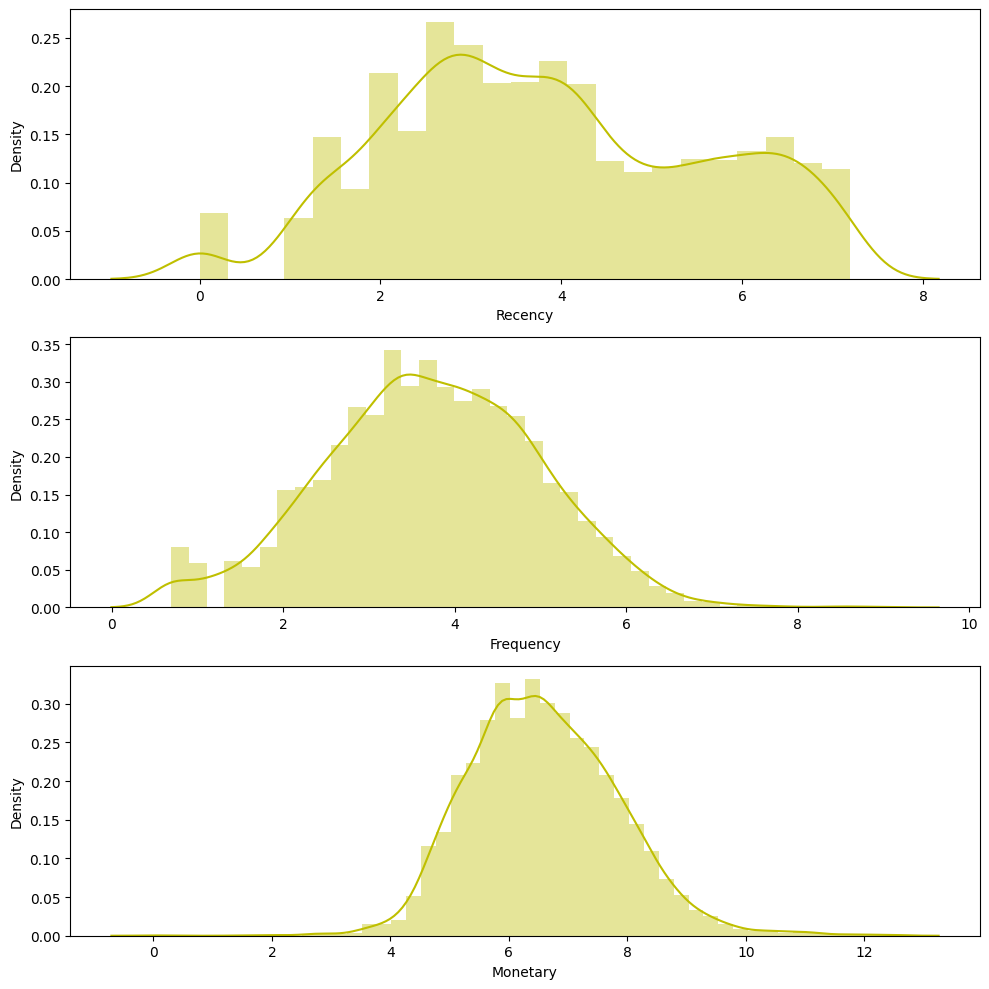

In [165]:
plt.figure(figsize=(10,10))
for i, col in enumerate(dataset_rfm):
    ax = plt.subplot(3,1, i+1)
    sns.distplot(dataset_rfm[col], color='y')
plt.tight_layout()

### 4. Data Scaling

In [166]:
dataset_rfm.tail()

,Recency,Frequency,Monetary
CustomerID,,,
18280.0,6.518684,2.397895,5.201806
18281.0,5.646216,2.079442,4.404522
18282.0,1.912931,2.564949,5.187665
18283.0,1.442250,6.582025,7.623901
18287.0,3.476027,4.262680,7.516586


In [167]:
dataset_rfm1 = dataset_rfm.copy()

In [168]:
dataset_rfm1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,6.875344,0.693147,11.253955
12347.0,1.000000,5.209486,8.368925
12348.0,4.198336,3.465736,7.494564
12349.0,2.620741,4.304065,7.472245
12350.0,6.760614,2.890372,5.815324


In [169]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dataset_rfm)
dataset_rfm_normal = sc.transform(dataset_rfm)

In [170]:
dataset_rfm_normal

array([[ 1.75469533, -2.43663517,  3.69768662],
       [-1.63263673,  1.18886461,  1.41181999],
       [ 0.21131096, -0.21093425,  0.71904602],
       ...,
       [-1.10630144, -0.93404238, -1.10875557],
       [-1.3776651 ,  2.29067291,  0.8215225 ],
       [-0.20512475,  0.42881405,  0.73649444]])

##### Which method have you used to scale you data and why?

The point of normalization is to change your observations so that they can be described as a normal distribution. Standardization (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

## ***6. ML Model Implementation***

### ML Model - 1 - K-Means Clustering - With all three i.e. Recency, Frequency, Monetary

In [171]:
from sklearn.cluster import KMeans

Firstly, we will have to determine the value of k which is the number of clusters. There are several methods to dtermine the same. Some of them are:
* Elbow Method
* Silhouette Method

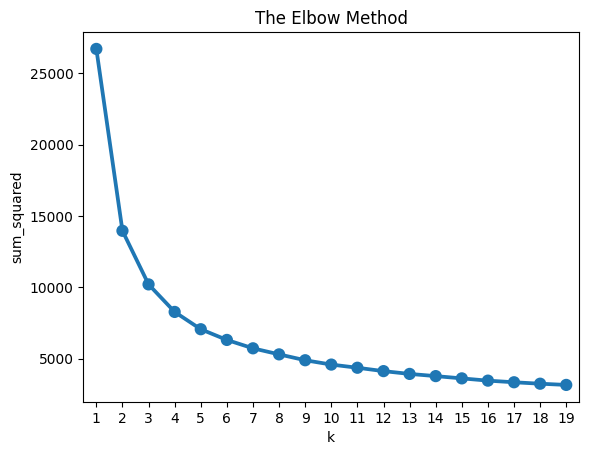

In [172]:
# Determining the number of clusters using Elbow Method
sum_squared = {}
for k in range(1,20):
  km = KMeans(n_clusters = k)
  km = km.fit(dataset_rfm)
  sum_squared[k] = km.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('sum_squared')
sns.pointplot(x=list(sum_squared.keys()), y=list(sum_squared.values()))
plt.show()

We can see from the graph that the value of k = 3 or k = 4 will be suitable for us since the line almost flattens after that. 

In [173]:
from sklearn.metrics import silhouette_score

In [174]:
# Determining the value of k using Silhouette Score Method
for k in range(2,20):
  km_silhouette = KMeans(n_clusters = k)
  preds = km_silhouette.fit_predict(dataset_rfm)
  # centers = km_silhouette.cluster_centers_

  score = silhouette_score(dataset_rfm, preds)
  print("For cluster = {}, silhouette score is {}".format(k, score))

For cluster = 2, silhouette score is 0.39504903112671375
For cluster = 3, silhouette score is 0.33639883222176575
For cluster = 4, silhouette score is 0.3233688441598271
For cluster = 5, silhouette score is 0.308923329329743
For cluster = 6, silhouette score is 0.2811072983325801
For cluster = 7, silhouette score is 0.2694616138970718
For cluster = 8, silhouette score is 0.2606008559134989
For cluster = 9, silhouette score is 0.26299620176727323
For cluster = 10, silhouette score is 0.2575694430496028
For cluster = 11, silhouette score is 0.2498574078500811
For cluster = 12, silhouette score is 0.2519155794680063
For cluster = 13, silhouette score is 0.25441873592315406
For cluster = 14, silhouette score is 0.24987539771284695
For cluster = 15, silhouette score is 0.25679903027867373
For cluster = 16, silhouette score is 0.24842289438483772
For cluster = 17, silhouette score is 0.2456476180175162
For cluster = 18, silhouette score is 0.2438769319112163
For cluster = 19, silhouette scor

Again we see that the value of k = 3 or k = 4 will be suitable for us. 

In [175]:
# Building our model with clusters = 3
model = KMeans(n_clusters=3, random_state=42)
model.fit(dataset_rfm_normal)

# Table showing how each lsuter differs
dataset_rfm["Cluster"] = model.labels_
dataset_rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          3.39      3.70     6.47  1796
1          5.61      2.57     5.48  1389
2          2.39      5.17     8.09  1154

From the table above we can infer that:
* Cluster 2 - They are more frequent in purchasing, spend the most money and they bought the product recently. Therefore, it could be a cluster for loyal customer. 
* Cluster 0 - They are less frequent than cluster 2 but more frequent than cluster 1, they spend more money than Cluster 1 but less than cluster 2 and they bought the product rencently too when compared to Cluster 1. Therefore, it could be a cluster of risky customers.
* Cluster 1 - They are less frequent, spend the least money and they bought the product at a much later date. Therefore, it could be a cluster for churned customer. 

In [176]:
y_model = model.predict(dataset_rfm_normal)

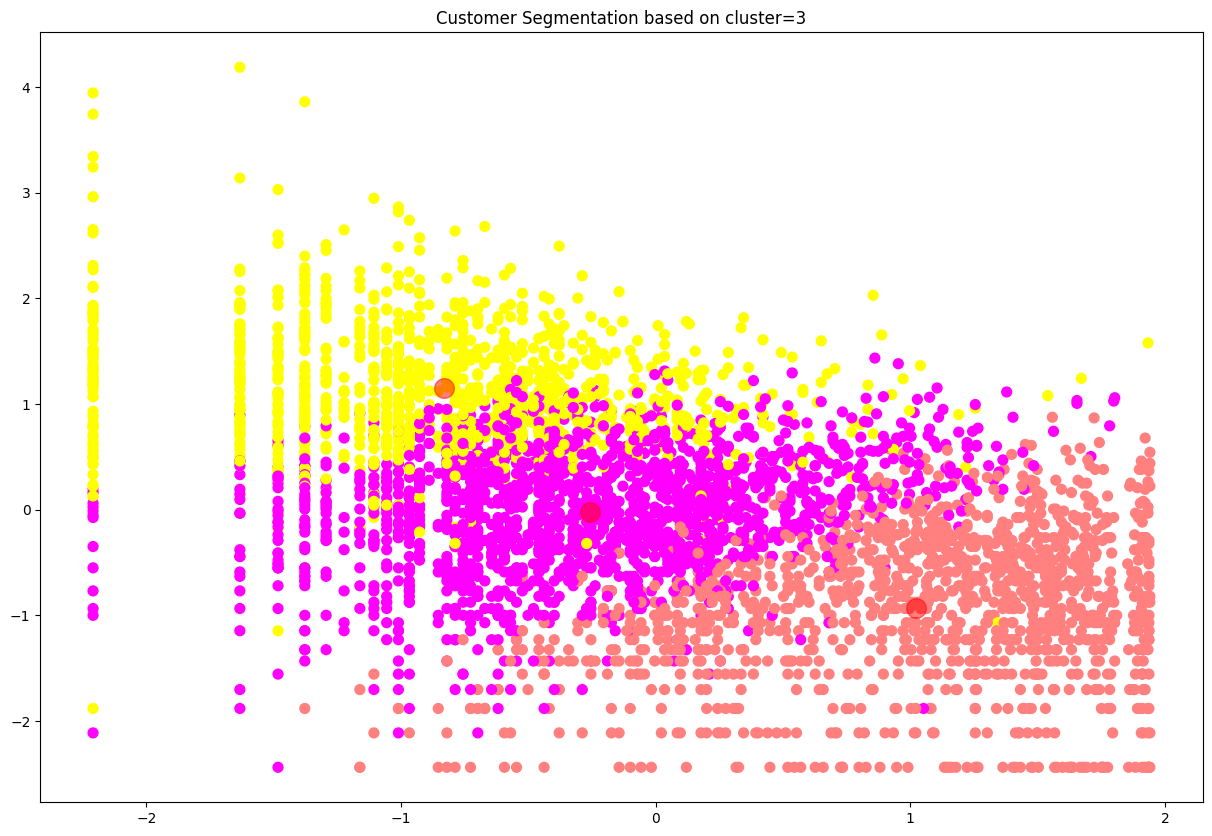

In [177]:
plt.figure(figsize=(15,10))
plt.title('Customer Segmentation based on cluster=3')
plt.scatter(dataset_rfm_normal[:, 0], dataset_rfm_normal[:, 1], c=y_model, s=50, cmap='spring')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [178]:
# Building our model with clusters = 4
model = KMeans(n_clusters=4, random_state=42)
model.fit(dataset_rfm_normal)

# Table showing how each lsuter differs
dataset_rfm["Cluster"] = model.labels_
dataset_rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          3.65      4.19     6.98  1473
1          6.11      2.68     5.57  1083
2          3.17      2.78     5.63   935
3          1.97      5.32     8.25   848

From the table above we can infer that:

* Cluster 3 - They are more frequent in purchasing, spend the most money and they bought the product recently. Therefore, it could be a cluster for loyal customer.
* Cluster 0 - They are less frequent than cluster 3, they spend less money than cluster 3 and they bought the product recently too. Therefore, it could be a cluster of new customers.
* Cluster 2 - They are less frequent than cluster 0, money spent is equal or more than cluster 0 and they bought the product recently too. Therefore, it could be a clsuter of risky customers.
* Cluster 1 - They are less frequent, spend the least money and they bought the product at a much later date. Therefore, it could be a cluster for churned customer.

In [179]:
y_model = model.predict(dataset_rfm_normal)

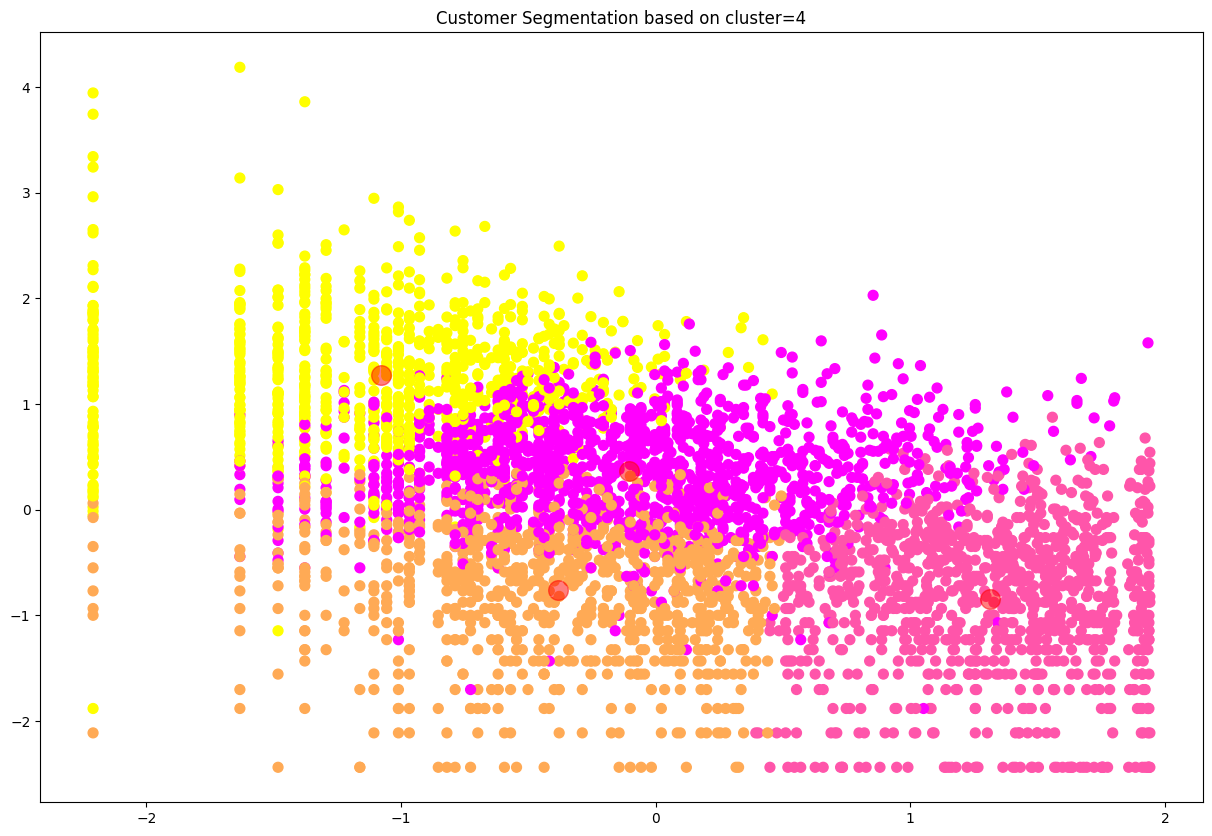

In [180]:
plt.figure(figsize=(15,10))
plt.title('Customer Segmentation based on cluster=4')
plt.scatter(dataset_rfm_normal[:, 0], dataset_rfm_normal[:, 1], c=y_model, s=50, cmap='spring')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### ML Model - 2 - Hierarchical Clustering

In [181]:
dataset_rfm1.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [182]:
from sklearn.cluster import AgglomerativeClustering

In [183]:
dataset_rfm2 = dataset_rfm1[['Recency','Frequency']]

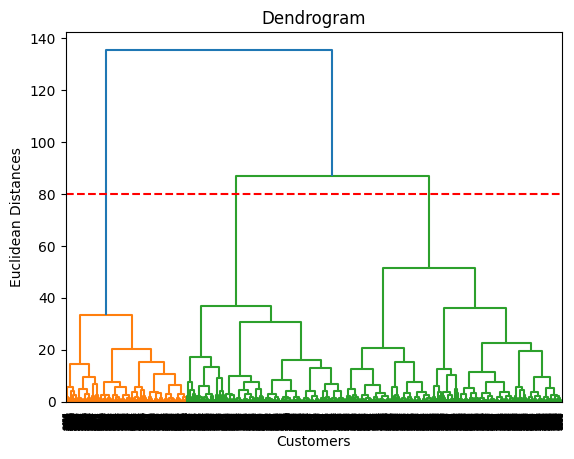

In [184]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_rfm2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

In [185]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward",affinity='euclidean')
clustering_model.fit(dataset_rfm2)
labels = clustering_model.labels_

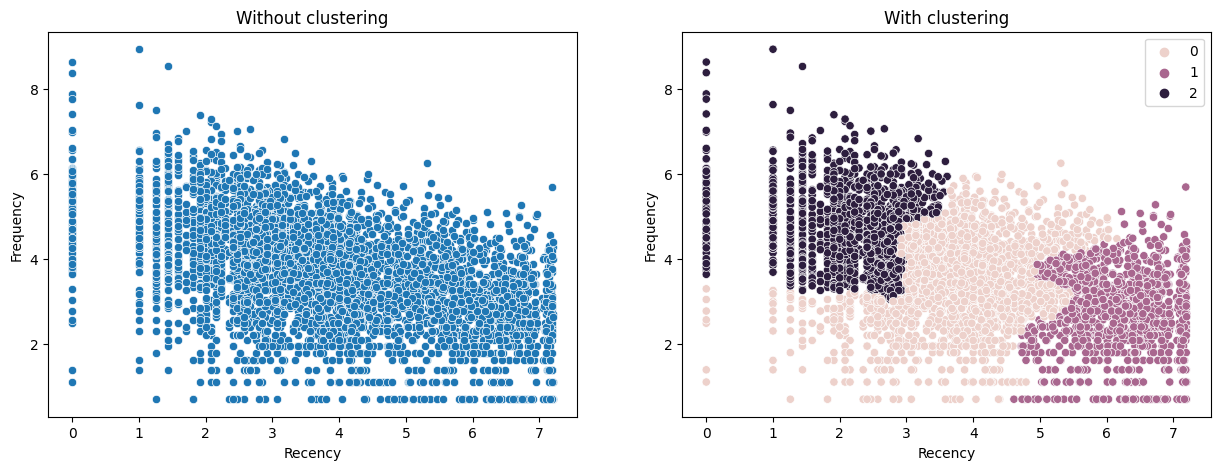

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=dataset_rfm2, x='Recency', y='Frequency').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=dataset_rfm2, x='Recency', y='Frequency', hue=clustering_model.labels_).set_title('With clustering');

* Cluster 2 - Have low recency. High frequency. Loyal customers.
* Cluster 1 - Medium recency and medium frequency. At risk customers.
* Cluster 0 - High recency and low frequency. Churned Customers.

Creating another model. This time Recency vs Monetary.

In [187]:
dataset_rfm3 = dataset_rfm1[['Recency','Monetary']]

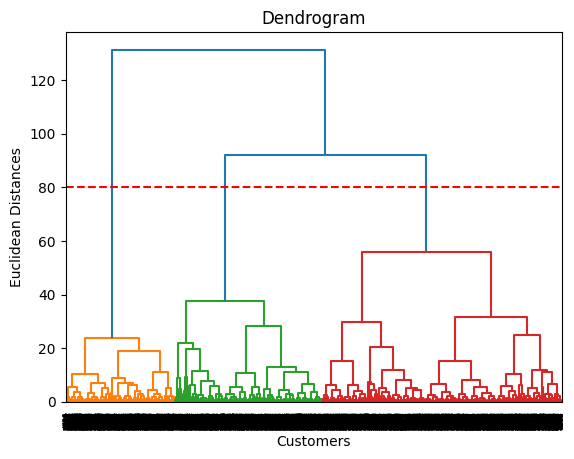

In [188]:
dendrogram = sch.dendrogram(sch.linkage(dataset_rfm3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

In [189]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward",affinity='euclidean')
clustering_model.fit(dataset_rfm3)
labels = clustering_model.labels_

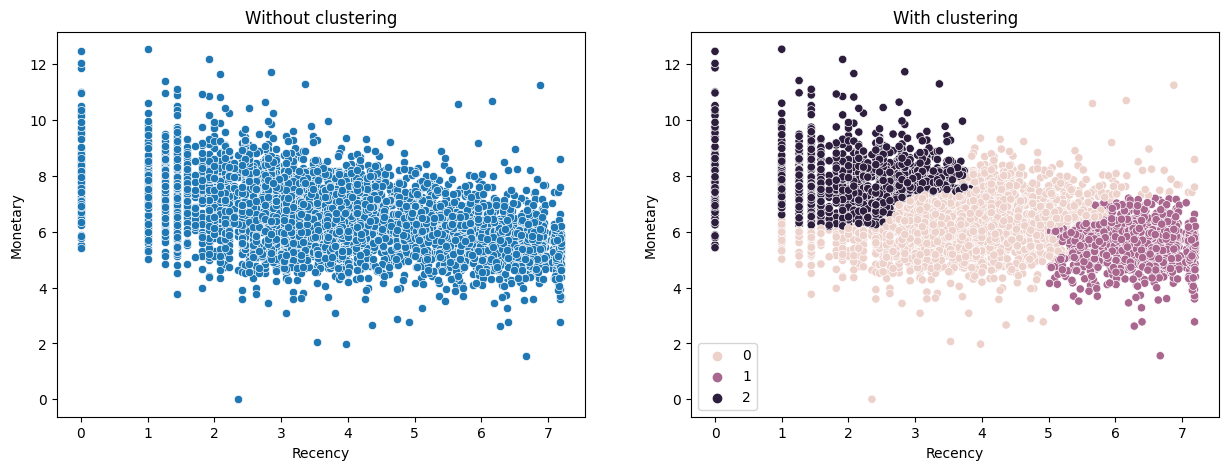

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=dataset_rfm3, x='Recency', y='Monetary').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=dataset_rfm3, x='Recency', y='Monetary', hue=clustering_model.labels_).set_title('With clustering');

* Cluster 2 - High recency. High monetray value. Loyal Customers.
* Cluster 0 - Medium recency. medium monetary value. At risk customers.
* Cluster 1 - Low monetary value. High recency. Churned Customer.s

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Depending on the business objectives, we have to determing the number of clusters. It can vary from 3 or 4 or 5 or any other number based on business requirements.

k = 3 or number of clusters = 3 shoudl be a good start and can create a business impact. 

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From all the model impplementation, I would choose Aggolomerative Hierarchical Clustering. Choose number of clusters as 3 and choose Recency vs. Monetary because it gives us a clean and clear cluster. 

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [191]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [192]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Problem statement was to identify major customer segments on a transnational data set.
* Dataset given to us were not clean.
  * Had duplicate values. Removed them.
  * Had null values in CustomerID. Removed all the rows with null values.
* Based on our data:
  * United Kingdom had the most number of customers followed by Germany and France.
  * White Hanging Heart T-Light Holder is the topmost product.
  * Cusomter with CustomerId = 14646 is the top customer. He has spent well over 250000. 
  * Paper Craft, Little Berdie is the top product on the basis of Quantities Sold.
  * Picnic Basket Wiwcker 60 pieces is the top product on the basis of Mean Prices.
  * Months - November, October, December has the most number of sales.
* Created a RFM Model and assigned it to all our CustomerID.
* All the variables were positively skewed. 
* LogTransformation and CubeRoot Transformation were used. 
* StandardScaler used to scale our variables.
* Used 2 alogrithmsn to solve our problem statement:
  * KMeans Clustering.
  * Agollomerative Clustering.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***